# Seasonal Adjustment

## Load Data

In [224]:
## Libraries
# lightkurve
#import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import random
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
#import statsmodels.api as sm
# import itertools
# import warnings

In [225]:
## Data
df = pd.read_csv("../0.Data/031381302.csv") #, index_col = "time")

# Check
print(df.shape)
#df.info()

## Time Series of interest
pdcsap = df.loc[:, ["time", "pdcsap_flux"]]
# # Set "time" as index
# pdcsap.set_index("time", inplace=True)
# pdcsap.sort_index(inplace=True)

# Check
print(pdcsap.shape); pdcsap.info(); pdcsap.head()

(17719, 24)
(17719, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17719 entries, 0 to 17718
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         17719 non-null  float64
 1   pdcsap_flux  17033 non-null  float64
dtypes: float64(2)
memory usage: 277.0 KB


,time,pdcsap_flux
0,1437.978646,NaN
1,1437.980034,NaN
2,1437.981423,NaN
3,1437.982812,NaN
4,1437.984201,NaN


In [226]:
# # Identify large gap
# ind_diffs = pdcsap.index.to_series().diff()
# print(ind_diffs.describe())
# sns.boxplot(x = ind_diffs)

# bigDiff = np.where(ind_diffs > 0.2)[0][0]

# # Create interval
# intStart = pdcsap.index[bigDiff - 1]
# intEnd = pdcsap.index[bigDiff]
# print((intStart,intEnd))

# diffInt = np.linspace(start = intStart, stop = intEnd, retstep = ind_diffs.median())
# print(diffInt)

# # Inject interval
# full_index = 

# # pdcsap = pdcsap.reindex()

In [227]:
# pdcsap.set_index("time", inplace=True)
# pdcsap.sort_index(inplace=True)

# # Identify large gap
# ind_diffs = pdcsap.index.to_series().diff()
# print(ind_diffs.describe())

# # Create new index
# full_index = np.linspace(start = pdcsap.index.min(), stop = pdcsap.index.max(), retstep = ind_diffs.median())
# print(full_index)
# print(len(full_index[0]))

In [228]:
# Identify large gap
ind_diffs = pdcsap["time"].diff()
print(ind_diffs.describe())

# Create new index
full_index = np.arange(start = pdcsap["time"].min(), stop = pdcsap["time"].max() + ind_diffs.median(), step = ind_diffs.median())
print((pdcsap["time"].min(), pdcsap["time"].max()))
print(full_index)

print(len(full_index))

print(type(full_index))

count    17718.000000
mean         0.001485
std          0.010208
min          0.001389
25%          0.001389
50%          0.001389
75%          0.001389
max          1.358323
Name: time, dtype: float64
(1437.978645522663, 1464.2854684532865)
[1437.97864552 1437.98003441 1437.98142329 ... 1464.28269227 1464.28408115
 1464.28547003]
18942
<class 'numpy.ndarray'>


In [229]:
# pdcsap["time"].round(3)

In [230]:
# a = abs(full_index - pdcsap["time"]) < 0.001
a = full_index[1:100].round(5) == pdcsap["time"][1:100].round(5)

print(a)
print((a.sum(), len(a)))

print(pdcsap["time"])
print(full_index)

len(pdcsap["time"])

1     True
2     True
3     True
4     True
5     True
      ... 
95    True
96    True
97    True
98    True
99    True
Name: time, Length: 99, dtype: bool
(95, 99)
0        1437.978646
1        1437.980034
2        1437.981423
3        1437.982812
4        1437.984201
            ...     
17714    1464.278524
17715    1464.279913
17716    1464.281302
17717    1464.282691
17718    1464.285468
Name: time, Length: 17719, dtype: float64
[1437.97864552 1437.98003441 1437.98142329 ... 1464.28269227 1464.28408115
 1464.28547003]


17719

In [231]:
# # Reindex
# newDF = pd.DataFrame({"time": full_index})
# #print((newDF.shape, newDF.head()))
# print(pdcsap.info())
# # Apply fuzzy matching to get closest matches
# deg = 3
# pdcsap["time_id"] = pdcsap["time"].round(deg)
# newDF["time_id"] = newDF["time"].round(deg)


# newPdcsap = pd.merge(newDF, pdcsap, on = "time_id", how = "left")
# print((newPdcsap.shape, newPdcsap.describe(), newPdcsap.info()))

In [232]:
# from rapidfuzz import process

# # Reindex
# # pdcsap = pdcsap.reindex(index = full_index[0])

# newDF = pd.DataFrame({"time": full_index})
# print((newDF.shape, newDF.head()))

# # Define a function for fuzzy matching
# def get_closest_match(name, choices, cutoff=80):
#     match = process.extractOne(name, choices)
#     return match[0] if match[1] >= cutoff else None

# # Apply fuzzy matching to get closest matches
# pdcsap["time_str"] = pdcsap["time"].round(6).astype(str)
# newDF["time_str"] = newDF["time"].round(6).astype(str)
# newDF["time_str"] = newDF["time_str"].apply(lambda x: get_closest_match(x, pdcsap["time_str"]))


# newPdcsap = pd.merge(newDF, pdcsap, on = "time_str", how = "left")
# print(newPdcsap.head())
# print((newPdcsap.shape, newPdcsap.describe(), newPdcsap.info()))


In [249]:
b = pdcsap["time"][5000]; d = 0
test = np.argwhere(abs(b - full_index) > d)

test

array([[    0],
       [    1],
       [    2],
       ...,
       [18939],
       [18940],
       [18941]], dtype=int64)

In [ ]:
# Reindex
newDF = pd.DataFrame({"time": full_index})
print(newDF.shape); print(newDF.head())

# Define a function for fuzzy matching
def get_match(val, choices, deg = 0.00001):
    match = np.where(np.abs(choices - val) < deg)
    if len(match) > 0:
        return choices[match[0][0]]
    return None

# Apply fuzzy matching to get closest matches
newDF["time_id"] = newDF["time"].apply(lambda x: get_match(x, pdcsap["time"], deg = 0.00001))
pdcsap["time_id"] = pdcsap["time"]

newPdcsap = pd.merge(newDF, pdcsap, on = "time_id", how = "left")
print(newPdcsap.head())
print((newPdcsap.shape, newPdcsap.describe(), newPdcsap.info()))

(18942, 1)
          time
0  1437.978646
1  1437.980034
2  1437.981423
3  1437.982812
4  1437.984201


IndexError: index 0 is out of bounds for axis 0 with size 0

In [259]:
val = full_index[100]; print(val)
choices = pdcsap["time"]; print(choices)
deg = 0.000001

match = abs(val - choices) < deg; print(match)

bonk = np.where(np.abs(choices - val) < deg); print(bonk)

choices[bonk[0][0]]

len(bonk)
# get_match(full_index[100], pdcsap["time"])

1438.1175337783598
0        1437.978646
1        1437.980034
2        1437.981423
3        1437.982812
4        1437.984201
            ...     
17714    1464.278524
17715    1464.279913
17716    1464.281302
17717    1464.282691
17718    1464.285468
Name: time, Length: 17719, dtype: float64
0        False
1        False
2        False
3        False
4        False
         ...  
17714    False
17715    False
17716    False
17717    False
17718    False
Name: time, Length: 17719, dtype: bool
(array([100], dtype=int64),)


1

In [172]:
newPdcsap = newPdcsap.loc[:,["time_x", "pdcsap_flux"]]

print(newPdcsap.describe())
print(newPdcsap.info())

             time_x  pdcsap_flux
count  18942.000000  1204.000000
mean    1451.132058  1564.448885
std        7.594728     9.987849
min     1437.978646  1537.448700
25%     1444.555352  1557.914225
50%     1451.132058  1564.107050
75%     1457.708764  1570.776975
max     1464.285470  1679.386400
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18942 entries, 0 to 18941
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_x       18942 non-null  float64
 1   pdcsap_flux  1204 non-null   float64
dtypes: float64(2)
memory usage: 444.0 KB
None


In [ ]:
# import fuzzy_pandas as fpd

# # Reindex
# # pdcsap = pdcsap.reindex(index = full_index[0])

# newDF = pd.DataFrame({"time": full_index})
# print((newDF.shape, newDF.head()))

# newPdcsap = pd.merge(newDF, pdcsap, on = "time_str", how = "left")


# print(newPdcsap.head())
# print((newPdcsap.shape, newPdcsap.describe(), newPdcsap.info()))

In [173]:
pdcsap = pdcsap.loc[:, ["time", "pdcsap_flux"]]
pdcsap.set_index("time", inplace = True)
pdcsap.sort_index(inplace=True)

newPdcsap["time"] = newPdcsap["time_x"]
newPdcsap = newPdcsap.loc[:, ["time", "pdcsap_flux"]]
newPdcsap.set_index("time", inplace = True)
newPdcsap.sort_index(inplace=True)

       pdcsap_flux
count  1204.000000
mean   1564.448885
std       9.987849
min    1537.448700
25%    1557.914225
50%    1564.107050
75%    1570.776975
max    1679.386400


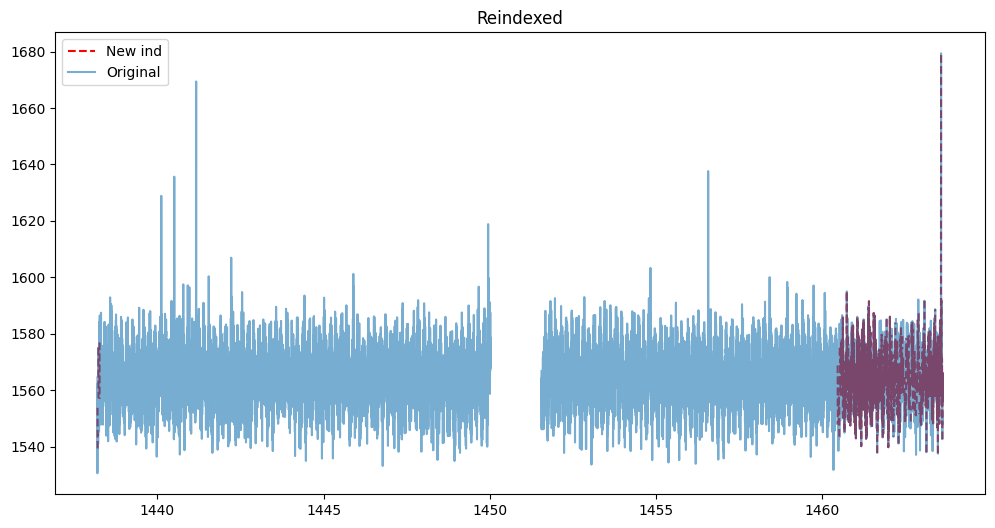

In [174]:
# pdcsap = newPdcsap

print(newPdcsap.describe())

# Plot
plt.figure(figsize=(12,6))
plt.plot(newPdcsap, label='New ind', linestyle='--', color='red')
plt.plot(pdcsap, label='Original', alpha=0.6)
plt.title("Reindexed")
plt.legend()
plt.show()

In [ ]:
## Identify missing_indices
missing_indices = pdcsap[pdcsap.isna()].index
print(missing_indices[0:5])

Float64Index([ 1437.978645522663, 1437.9800344004182, 1437.9814232781732,
              1437.9828121559574, 1437.9842010337416],
             dtype='float64', name='time')


## STL

In [14]:
# ## Temporary Interpolation for STL
# pdcsap_interpolated = pdcsap.interpolate(method = "linear")

# # Check
# pdcsap_interpolated.info()

# Impute missing values (temporary)
# pdcsap_mod: Modified pdcsap_flux by imputing them with the mean (temporary).
pdcsap.fillna(pdcsap["pdcsap_flux"].mean(), inplace=True)

# Check
pdcsap.info()

pdcsap.describe(percentiles=[0.25, 0.5, 0.75])


<class 'pandas.core.frame.DataFrame'>
Float64Index: 17719 entries, 1437.978645522663 to 1464.2854684532865
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pdcsap_flux  17719 non-null  float64
dtypes: float64(1)
memory usage: 276.9 KB


,pdcsap_flux
count,17719.000000
mean,1564.459684
std,9.134393
min,1530.508200
25%,1558.443950
50%,1564.459684
75%,1570.340550
max,1679.386400


In [15]:
## STL Decomposition
stl = STL(pdcsap, period=240, robust=True)  # Use period=240 based on EDA
decomposition = stl.fit()

# Extract components
trend = decomposition.trend #.reindex_like(pdcsap)
seasonal = decomposition.seasonal
residual = decomposition.resid

# Check
residual.info(); residual.head()

residual.describe(percentiles=[0.25, 0.5, 0.75])

<class 'pandas.core.series.Series'>
Float64Index: 17719 entries, 1437.978645522663 to 1464.2854684532865
Series name: resid
Non-Null Count  Dtype  
--------------  -----  
17719 non-null  float64
dtypes: float64(1)
memory usage: 276.9 KB


count    17719.000000
mean         0.037706
std          6.770368
min        -50.116746
25%         -3.398039
50%          0.027174
75%          3.435023
max         91.912611
Name: resid, dtype: float64

### Examination

<Figure size 600x500 with 0 Axes>

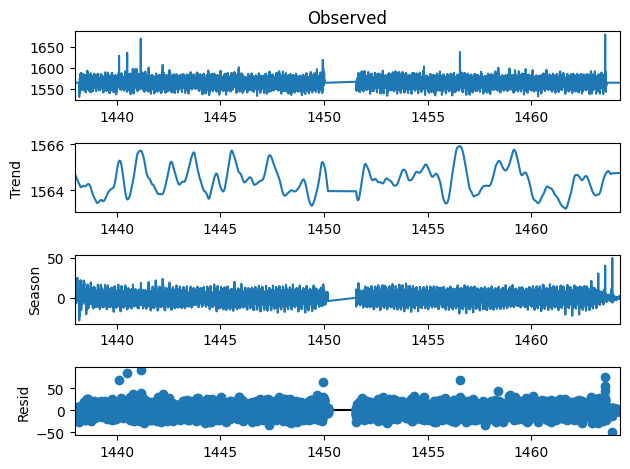

In [16]:
## Plot
plt.figure(figsize = (6, 5))
decomposition.plot()

plt.show()

## ARIMA Imputation

### Helper Function

In [17]:
## Pyramid ARIMA
from pmdarima import auto_arima

# Function to automatically impute using auto_arima
def auto_arima_impute(series, missing_indices,
                      start_p = 0, max_p = 5, start_q = 0, max_q = 5): #seasonal = False, m = 1):
    """
    Impute missing values using auto_arima model.
    Parameters:
        series (pd.Series): Time series data with NaN values
        seasonal (bool): If True, fit seasonal ARIMA
        m (int): Seasonal period for SARIMA
    Returns:
        pd.Series: Imputed time series
    """
    series_filled = series.copy()
    
    # # Identify missing value indices
    # missing_indices = series[series.isna()].index
    
    # Fit auto_arima on non-missing values
    model = auto_arima(series, #.dropna(),
                       start_p = start_p, max_p = max_p,
                       start_q = start_q, max_q = max_q,
                       seasonal=False,
                       information_criterion= "aic",
                       #m=m,
                       #stepwise=True,
                       trace=True#,
                       #error_action='ignore',
                       #suppress_warnings=True
                       )
    
    print(f"Selected ARIMA order: {model.order}")

    # # # Re-add the missing indices
    # # series_filled.loc[missing_indices] = np.nan
    
    # # Predict missing values
    # for idx in missing_indices:
    #     pred_value = model.predict(n_periods=1)[0]  # Get forecast
    #     series_filled.loc[idx] = pred_value  # Fill missing value
        
    #     # Update model with newly imputed value
    #     model.update(series_filled.dropna())

    # # Step 4: Re-add the missing indices
    # # series_filled = series_filled.reindex_like(pdcsap)
    # series_filled.loc[missing_indices] = np.nan

    # # Predict missing values relative to index
    # for idx in missing_indices:
    #     # Get the index just before the missing value
    #     last_valid_index = series_filled[:idx].last_valid_index()
    #     if (last_valid_index == None):
    #         last_valid_index = idx
    #     start_ind = np.where(pdcsap.index == last_valid_index)[0][0]
    #     end_ind = np.where(pdcsap.index == idx)[0][0]
        
    #     # Forecast at the specific index
    #     # Use dynamic forecasting to predict relative to the last valid index
    #     pred_value = model.predict_in_sample(start = start_ind, end = end_ind)#.loc[idx]
    #     series_filled.loc[idx] = pred_value[0]
        
    #     # Update model with newly imputed value
    #     model.update(series_filled.dropna())

    # pred_values = model.predict_in_sample(start = series_filled.index.min(), end = series_filled.index.max())
    # series_filled.loc[missing_indices] = pred_values.loc[missing_indices]

    # pred_vals = model.predict_in_sample(start = 0, end = series_filled.shape[0] - 1) # start = d?
    # residual.loc[missing_indices[d:]] = pred_vals[np.isin(pdcsap.index[d:], missing_indices)] # technically, only first d elements of pdcsap are problematic, not the first d elements of missing_indices - room for improvement.

    d = model.order[1]
    pred_vals = model.predict_in_sample(start = d, end = series_filled.shape[0] - 1)
    series_filled.loc[missing_indices[np.isin(missing_indices, pdcsap.index[1:])]] = pred_vals[np.isin(pdcsap.index[d:], missing_indices)] 
    
    return series_filled

In [ ]:
## ROUGH WORK ##



### ARIMA Orders

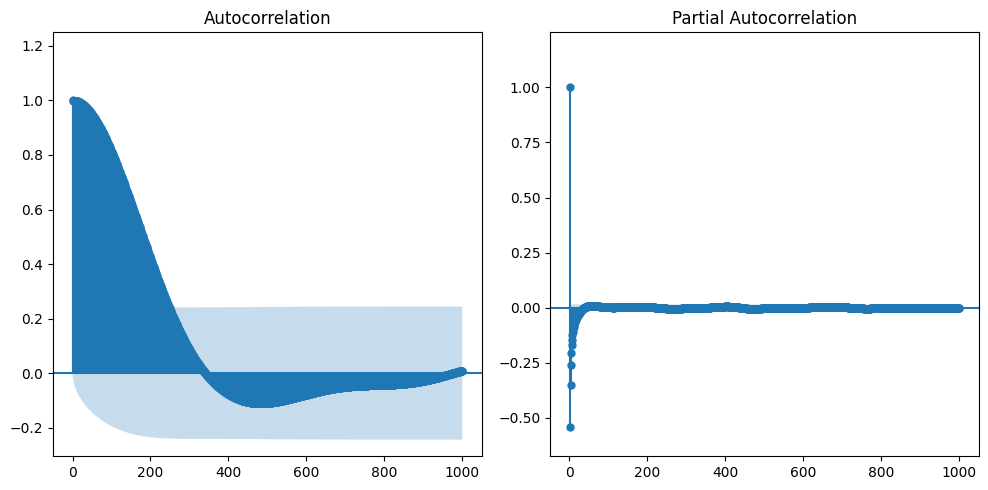

In [55]:
## Trend
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns
plot_acf(trend, lags = 1000, ax = ax[0], auto_ylims = True, zero = False)
plot_pacf(trend, lags = 1000, ax = ax[1], method = "ywm", auto_ylims = True, zero = False)

plt.tight_layout()
plt.show()

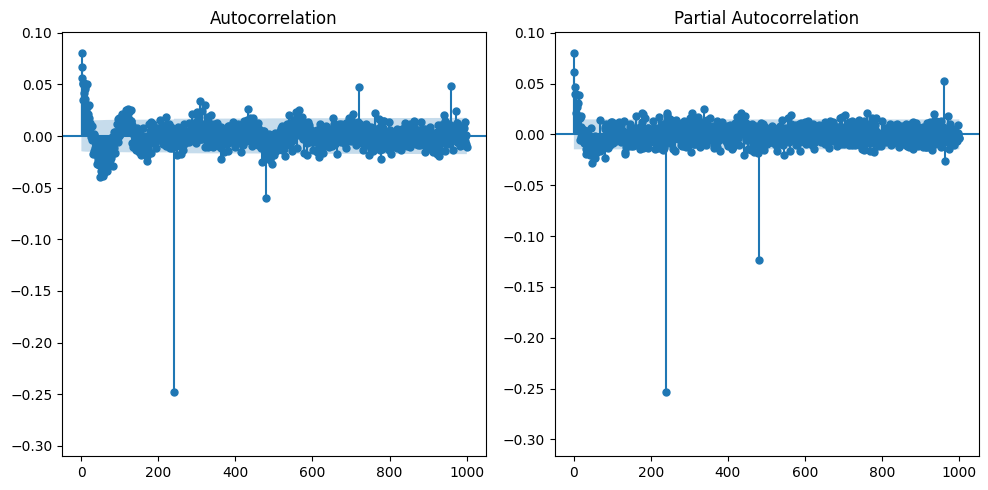

In [56]:
## Residuals
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns
plot_acf(residual, lags = 1000, ax = ax[0], auto_ylims = True, zero = False)
plot_pacf(residual, lags = 1000, ax = ax[1], method = "ywm", auto_ylims = True, zero = False)

plt.tight_layout()
plt.show()

### Imputation

In [ ]:
# test =  auto_arima(residual, start_p = 0, max_p = 5,
#                        start_q = 0, max_q = 5,
#                        seasonal=False,
#                        information_criterion= "aic",
#                        #m=m,
#                        #stepwise=True,
#                        trace=True#,
#                        #error_action='ignore',
#                        #suppress_warnings=True
#                        )

In [ ]:
# test1 = auto_arima_impute(residual, missing_indices)
# test1.info()

In [ ]:
# temp = residual.copy()

# # Step 4: Re-add the missing indices
# temp.loc[missing_indices] = np.nan

# # Predict missing values relative to index
# for idx in missing_indices[10:12]:
#     print(idx)
#     # Get the index just before the missing value
#     last_valid_index = temp[:idx].last_valid_index()
#     if (last_valid_index == None):
#         last_valid_index = idx
#     start_ind = np.where(pdcsap.index == last_valid_index)[0][0]
#     end_ind = np.where(pdcsap.index == idx)[0][0]
#     print((start_ind, end_ind))

#     # Forecast at the specific index
#     # Use dynamic forecasting to predict relative to the last valid index
#     #pred_value = test.predict_in_sample(start = start_ind, end = end_ind)[idx]
#     pred_value = test.predict_in_sample(start = start_ind, end = end_ind)#.loc[idx]
#     print(pred_value[0])
#     temp.loc[idx] = pred_value[0]
    
#     # Update model with newly imputed value
#     test.update(temp.dropna())

1437.9925343006212
(10, 10)
0.15218798495046126
1437.9939231784629
(10, 11)
0.15218798495046126


In [ ]:
# temp = residual.copy()

# # Predict missing values relative to index
# for idx in missing_indices[10:12]:
#     print(idx)
#     # Get the index just before the missing value
#     last_valid_index = temp[:idx].last_valid_index()
#     if (last_valid_index == None):
#         last_valid_index = idx
#     start_ind = np.where(pdcsap.index == last_valid_index)[0][0]
#     end_ind = np.where(pdcsap.index == idx)[0][0]
#     print((start_ind, end_ind))

#     # Forecast at the specific index
#     # Use dynamic forecasting to predict relative to the last valid index
#     #pred_value = test.predict_in_sample(start = start_ind, end = end_ind)[idx]
#     pred_value = test.predict_in_sample(start = start_ind, end = end_ind)#.loc[idx]
#     print(pred_value[0])
#     temp.loc[idx] = pred_value[0]
    
#     # Update model with newly imputed value
#     test.update(temp.dropna())

In [18]:
# Impute missing values using auto_arima for trend and residual
trend_filled = auto_arima_impute(trend, missing_indices)
residual_filled = auto_arima_impute(residual, missing_indices)

# Assume the seasonal component remains unchanged
seasonal_filled = seasonal

# Reconstruct the imputed time series
imputed_series = trend_filled + seasonal_filled + residual_filled

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-147873.632, Time=1.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=6.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-147875.632, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-318277.607, Time=9.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-369060.398, Time=7.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=5.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-372718.617, Time=37.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=13.73 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-368833.612, Time=16.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-369016.292, Time=8.67 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-368941.486, Time=9.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=26.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-369014.343, Time=10.12 sec


C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,1)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\alexd\AppDat

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 165.124 seconds
Selected ARIMA order: (3, 1, 1)
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=118063.032, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=117950.396, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=117962.818, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=117885.972, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=117849.522, Time=0.35 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=117823.975, Time=0.43 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=117798.456, Time=0.87 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=117714.537, Time=3.16 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=117713.521, Time=2.83 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=117711.962, Time=2.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=117710.023, Time=0.97 sec
 ARIMA(1,0,1)(0,0,0)[0]             : 

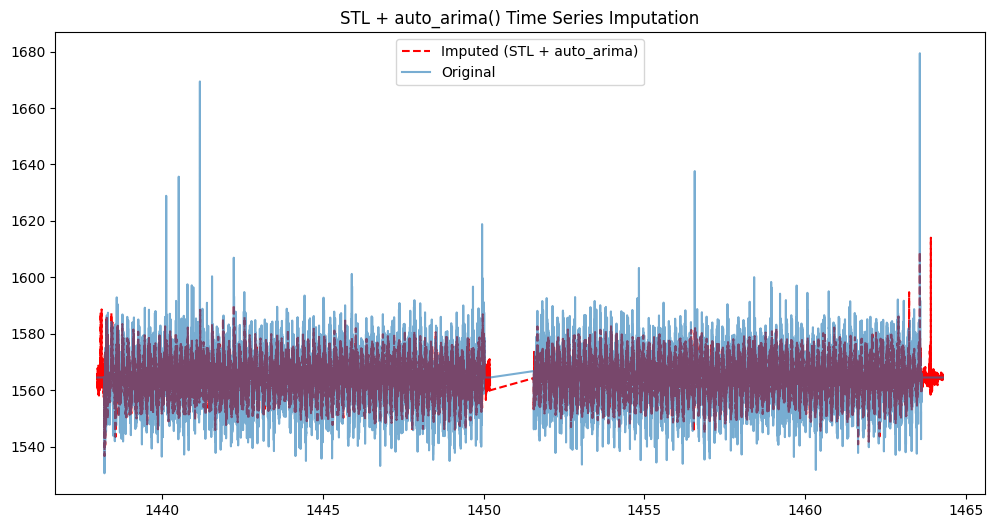

In [23]:
# Plot original vs imputed series
plt.figure(figsize=(12,6))
plt.plot(imputed_series, label='Imputed (STL + auto_arima)', linestyle='--', color='red')
plt.plot(pdcsap, label='Original', alpha=0.6)
plt.title("STL + auto_arima() Time Series Imputation")
plt.legend()
plt.show()

In [27]:
# decomposition.plot()

imputed_series.to_frame().query("1450.5 <= time < 1451")

type(imputed_series.index)

pandas.core.indexes.numeric.Float64Index

In [ ]:
## Normal ARIMA


In [ ]:
# Save the imputed dataset
pdcsap["pdcsap_imputed"] = imputed_series
pdcsap.to_csv("../0.Data/031381302_imputed.csv")